In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np
np.random.seed(42)

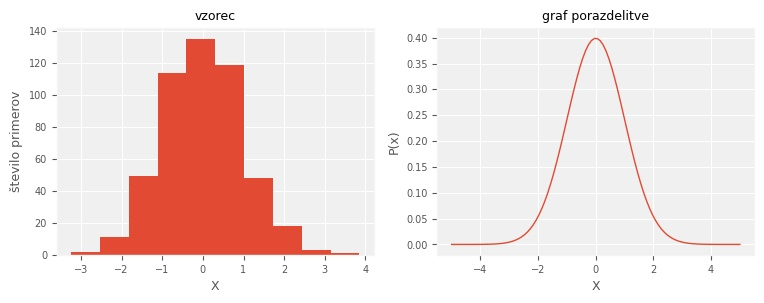

In [2]:
from scipy.stats import multivariate_normal as mvn 

# Parametri določajo obliko funkcije
mu     = 0   # sredina
sigma2 = 1   # varianca

n = 500  # velikost vzorca
sample = mvn.rvs(mu, sigma2, size=n)  # naključen vzorec n primerov

xr = np.linspace(-5, 5, 100)               # interval X 
P  = [mvn.pdf(x, mu, sigma2) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

In [3]:
mu_fit = np.mean(sample)
sigma2_fit = (n-1)/n * np.var(sample)

mu_fit, sigma2_fit

(0.006837994588647575, 0.9590103551480912)

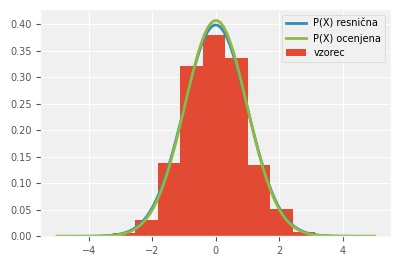

In [5]:
P_fit = [mvn.pdf(x, mu_fit, sigma2_fit) for x in xr]

plt.figure()
plt.hist(sample,    label="vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)  
plt.legend();

# Študentova porazdelitev

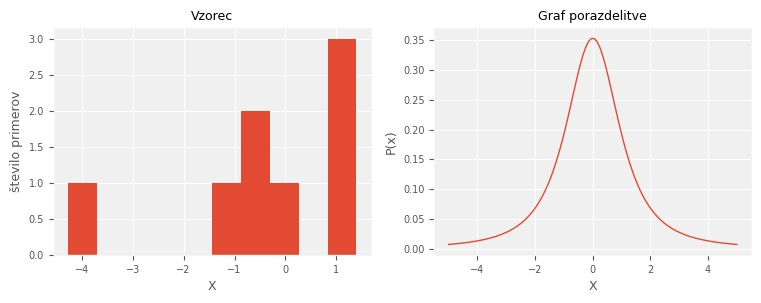

In [6]:
from scipy.stats import t as student 

# Parametri določajo obliko funkcije
nu = 2 # prostostne stopnje

n = 8  # velikost vzorca
sample = student.rvs(nu, size=n)  # naključen vzorec n primerov spremenljivke

xr = np.linspace(-5, 5, 100)  # interval X 
P  = [student.pdf(x, nu) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

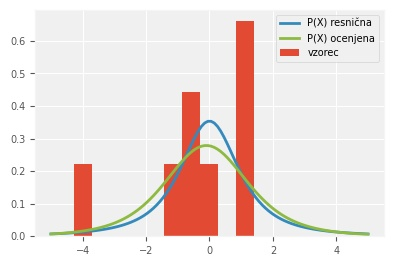

In [8]:
pars = student.fit(sample)
P_fit = [student.pdf(x, *pars) for x in xr ]

plt.figure()
plt.hist(sample,    label="vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)
plt.legend();

# Beta porazdelitev

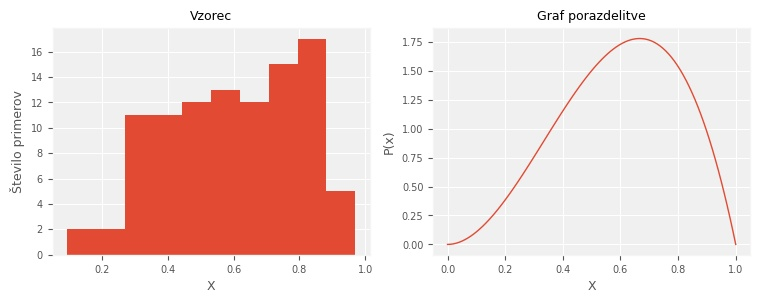

In [9]:
from scipy.stats import beta

# Parametri določajo obliko funkcije
a, b = (3, 2)    # parametra a, b

n = 100                            # velikost vzorca
sample = beta.rvs(a, b, size=n)        # naključen vzorec n primerov spremenljivke

xr = np.linspace(0, 1, 100)               # interval X 
P  = [beta.pdf(x, a, b) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("Število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

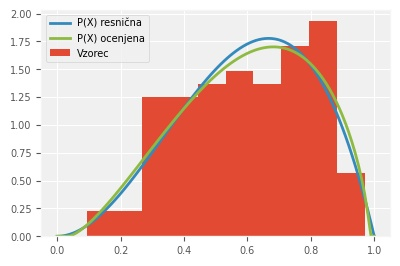

In [11]:
parameters = beta.fit(sample)
P_fit = [beta.pdf(x, *parameters) for x in xr ]

plt.figure()
plt.hist(sample,    label="Vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)   # ocenjena porazdelitev je model
plt.legend();